# Hive plots

## What are *hive plots*?

![](http://hiveplot.com/img/web-title.png)

The paper is Krzywinski M, Birol I, Jones S, Marra M (2011). [Hive Plots — Rational Approach to Visualizing Networks](http://bib.oxfordjournals.org/content/early/2011/12/09/bib.bbr069.short?rss=1). *Briefings in Bioinformatics* (early access 9 December 2011, doi: 10.1093/bib/bbr069)

According to the website, the idea is

> The hive plot is a rational visualization method for drawing networks. Nodes are mapped to and positioned on radially distributed linear axes — this mapping is based on network structural properties. Edges are drawn as curved links. Simple and interpretable.
> 
> The purpose of the hive plot is to establish a new baseline for visualization of large networks — a method that is both general and tunable and useful as a starting point in visually exploring network structure.
>
> Hive plots give the reader a passing chance to *quantitatively* understand important aspects of a network's structure. Unlike hairballs (Network visualizations: how to tame the complexity Paweł Widera describes may layout options), hive plots are excellent at managing the visual complexity arising from large number of edges and exposing both trends and outlier patterns in network structure.

A solution to problems of the *hairballs* force-vector layouts produce.

> The hive plot attempt to address the shortcomings of the conventional hairball layout. Because hive plots can be tuned, they can identify meaningful structural components of a network. Hive plots are ideal for detecting emerging patterns in your network's structure — the method shows you the entire network and your brain's pattern matching facilities do the rest.
>
> The hive plot is itself founded on a layout algorithm. However, its output is not based on aesthetics but network structure. In this sense, the layout is rational — it depends on network features that you care about (e.g. connectivity).
> 
> In a hive plot, nodes are constrained to linear axes and edges are drawn as curves. Node-to-axis assignment and node-on-axis position are determined solely by network structure, node, edge annotation, or any other meaningful properties of the network. In other words, layout rules are defined by you based on properties that are meaningful to you. These rules form a mapping between structure and layout can be as simple or complex as you wish. 

Mapping to axis (A, in figure below), position (B) and color (C)

![](http://hiveplot.com/img/hiveplot-mapping-01.png)

Ok so I'm interested, let's see it. There is the `jhive` Java application which feels pretty good, runs nicely, eats DOT files and has a query/domain language.

## Hive plots in Python

I see two Python modules, the [`pyveplot`](https://pypi.python.org/pypi/pyveplot/) which produces SVG output, and [`hiveplot`](https://github.com/ericmjl/hiveplot) which works with Matplotlib. Both are mentioned in the hive plot webpage.

Both build on NetworkX, which is good.

In [393]:
import logging
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [203]:
logging.getLogger().setLevel(logging.INFO)
logging.info('Ok logging ready INFO level')

INFO:root:Ok logging ready INFO level


As data, let's generate a preferential attachment graph with 50 nodes, and 4 edges per new node.

In [358]:
g = nx.barabasi_albert_graph(50, 4)

## First module `pyveplot`
Let's test `pyveplot` first

In [244]:
import pyveplot

In [377]:
h1 = pyveplot.Hiveplot('hiveplot_1.svg')
axis0 = pyveplot.Axis((200, 200), (200, 0), stroke="grey", stroke_width=0.5)
axis1 = pyveplot.Axis((200, 200), (332, 266), stroke="grey", stroke_width=1)
axis2 = pyveplot.Axis((200, 200), (66, 266), stroke="grey", stroke_width=2)

h1.axes = [axis0, axis1, axis2]

Ok wouldn't mind calculating those with a bit of trigonometry, to be honest.

Step one, select axes. Let's split the graph in three by degrees, and bin them on the axes. Selection and placement happens with `pyveplot.Axis.add_node(self, node, offset)`

In [361]:
g.degree()

DegreeView({0: 7, 1: 12, 2: 7, 3: 6, 4: 24, 5: 18, 6: 11, 7: 16, 8: 21, 9: 12, 10: 20, 11: 7, 12: 11, 13: 8, 14: 7, 15: 7, 16: 5, 17: 9, 18: 5, 19: 6, 20: 5, 21: 6, 22: 5, 23: 4, 24: 4, 25: 10, 26: 7, 27: 5, 28: 7, 29: 5, 30: 6, 31: 5, 32: 4, 33: 6, 34: 4, 35: 6, 36: 5, 37: 5, 38: 5, 39: 5, 40: 4, 41: 4, 42: 4, 43: 4, 44: 4, 45: 4, 46: 4, 47: 4, 48: 4, 49: 4})

In [380]:
bins = np.linspace(0, max(map(lambda l: l[1], g.degree())), 3)

for node_i, axis_i in enumerate(np.digitize(list(map(lambda l: l[1], g.degree())), bins)):
    axis = h1.axes[axis_i - 1]
    node = pyveplot.Node(node_i)
    #axis.add_node(node, 1/(g.degree()[node_i]))
    axis.add_node(node, np.random.random())

In [381]:
len(axis0.nodes), len(axis1.nodes), len(axis2.nodes)

(43, 6, 1)

Step two, draw the edges

In [382]:
EDGELOG = "edge {} from {} to {}"

for e in g.edges():
    if (e[0] in axis0.nodes) and (e[1] in axis1.nodes):       # edges from axis0 to axis1
        logging.info(EDGELOG.format(e, 'axis0', 'axis1'))
        h1.connect(axis0, e[0], 45,
                  axis1, e[1], -45,
                  stroke_width='1', stroke_opacity='0.4',
                  stroke='purple')
    elif (e[0] in axis0.nodes) and (e[1] in axis2.nodes):     # edges from axis0 to axis2
        logging.info(EDGELOG.format(e, 'axis0', 'axis2'))
        h1.connect(axis0, e[0], -45,
                  axis2, e[1], 45,
                  stroke_width='1', stroke_opacity='0.4',
                  stroke='red')
    elif (e[0] in axis1.nodes) and (e[1] in axis2.nodes):     # edges from axis1 to axis2
        logging.info(EDGELOG.format(e, 'axis1', 'axis2'))
        h1.connect(axis1, e[0], 15,
                  axis2, e[1], -15,
                  stroke_width='1', stroke_opacity='0.4',
                  stroke='magenta')

INFO:root:edge (0, 4) from axis0 to axis2
INFO:root:edge (1, 4) from axis1 to axis2
INFO:root:edge (2, 4) from axis0 to axis2
INFO:root:edge (2, 5) from axis0 to axis1
INFO:root:edge (3, 4) from axis0 to axis2
INFO:root:edge (3, 5) from axis0 to axis1
INFO:root:edge (6, 7) from axis0 to axis1
INFO:root:edge (6, 10) from axis0 to axis1


In [383]:
h1.save()

![](hiveplot_1.svg)

Ok phew manual labour involved.

## Second module `hiveplot`

This one uses Matplotlib

In [384]:
import hiveplot

In [395]:
g.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49))

In [401]:
groups

{'g1': [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48],
 'g2': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49],
 'g3': [2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47]}

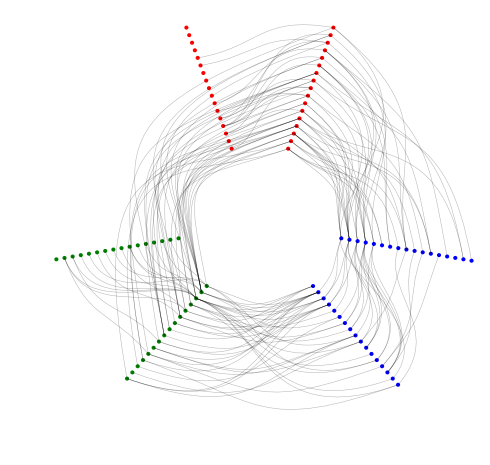

In [411]:
groups = dict()
groups['g1'] = [n for n in g.nodes() if n % 3 == 0]
groups['g2'] = [n for n in g.nodes() if n % 3 == 1]
groups['g3'] = [n for n in g.nodes() if n % 3 == 2]

cmap = {
    'g1': 'red',
    'g2': 'blue',
    'g3': 'green'
}

h2 = hiveplot.HivePlot(groups, {'all': g.edges(data=True)}, cmap)
h2.draw()